# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

def draw_top_30(df, title):
    # 產生 ducument_df
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['text'])
    words = count_vect.get_feature_names_out()
    document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    # 加總每個 token 出現的頻率
    top_30 = document_df.sum(axis=0).sort_values(ascending=False)[:30]
    # plot
    g = sns.barplot(x = top_30.index, y=top_30.values)
    g.set_xticks(range(len(top_30.index)))
    g.set_xticklabels(top_30.index, rotation = 90)
    g.set_xlabel("tokens")
    g.set_title(title)

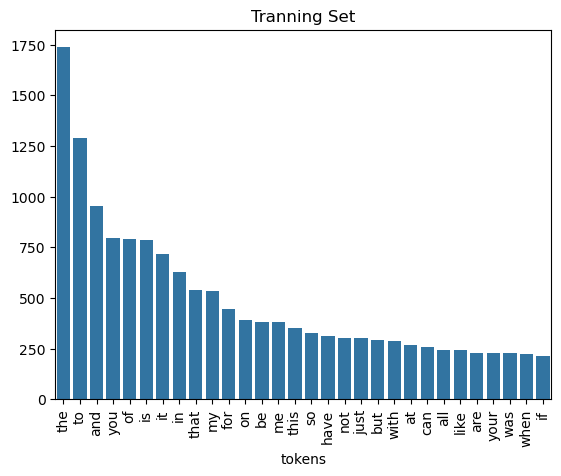

In [ ]:
draw_top_30(train_df, "Tranning Set")

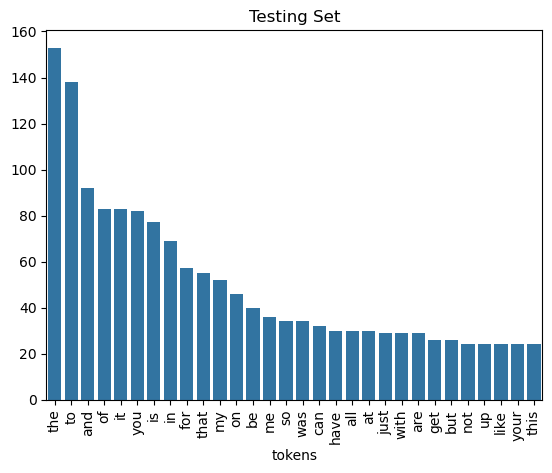

In [ ]:
draw_top_30(test_df, "Testing Set")

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

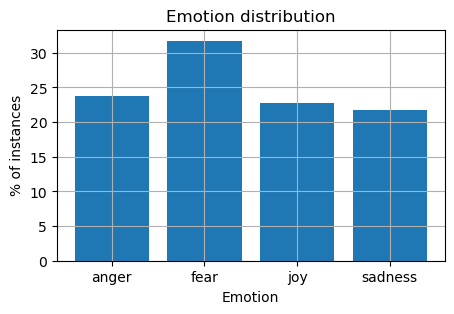

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (bag-of-words)
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape

/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 1000)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'sadness', 'fear', 'fear', 'fear', 'joy',
       'sadness', 'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [64]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

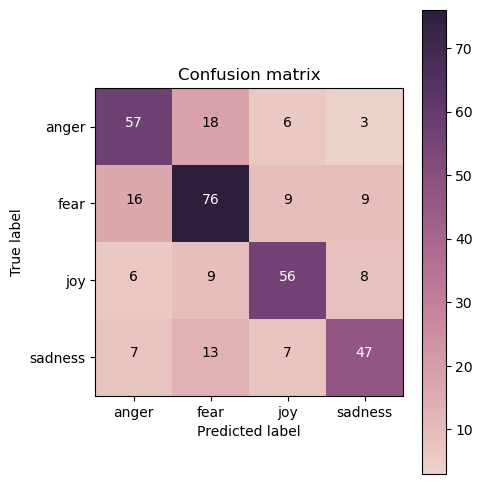

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

1. 整體正確分類效果
    - 對角線上的數值代表模型正確分類的次數（真實標籤和預測標籤一致）。
    - 最大的正確分類發生在「fear」，有 76 筆數據被正確分類。
    - 其次是「anger」和「joy」，分別有 57 和 56 筆數據被正確分類。
    - 最少的是「sadness」，只有 47 筆正確分類。
2. 模型對「fear」的分類能力較強
    - 「fear」的正確分類數最多，且其他情緒被誤分類為「fear」的次數（例如「anger」→「fear」為 16）也不少，這可能表示：
    - 「fear」的特徵表現與其他情緒有部分重疊。
    - 或模型過於傾向於將樣本預測為「fear」。
3. 誤分類情況
    - 「anger」最容易被誤分類為「fear」：有 18 筆「anger」被預測為「fear」。
    - 「sadness」也有不少樣本被預測為「fear」（13筆），可能暗示「fear」和「sadness」在某些特徵上有相似之處。
    - 「joy」和其他情緒的混淆程度相對較低，但仍有一些樣本被誤分類為「fear」（9筆）或「sadness」（8筆）。
4. 可能的解釋與改進方向
    - 資料特徵相似性：情緒之間有可能在特定的詞語或表達方式上相似，例如「fear」和「sadness」可能都包含負面語氣。
    - 解決方法：引入更多上下文訊息或更細緻的特徵，例如詞嵌入（word embeddings）或句子向量。

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.79
testing accuracy: 0.7

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



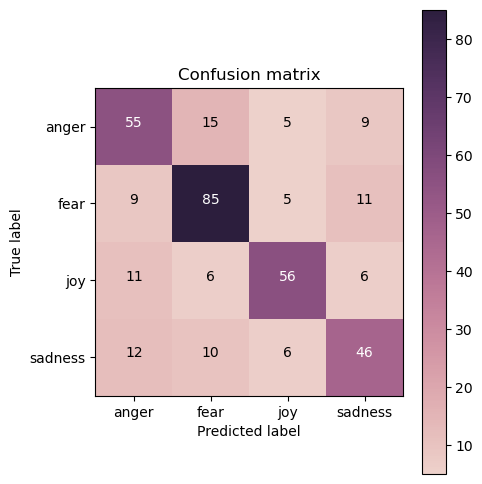

In [ ]:
# Answer here

# build MultinomialNB model
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()

# training!
NB_model = NB_model.fit(X_train, y_train)

# predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}\n'.format(round(acc_test, 2)))

# precision & recall &  f1-score
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

***準確度 (Accuracy)***
1. 決策樹：
    - 訓練準確度為 0.99，測試準確度為 0.68。
    - 訓練準確度明顯高於測試準確度，這表明模型可能存在 過擬合 (overfitting) 的問題，對訓練資料學得太多細節，但無法泛化到測試資料。
2. 貝氏分類：
    - 訓練準確度為 0.79，測試準確度為 0.70。
    - 訓練與測試準確度更為接近，這表明模型對資料的泛化能力較好，過擬合問題不嚴重。
3. 優劣：
    - 測試階段，貝氏分類的準確度 (0.70) 優於決策樹 (0.68)。
    - 過擬合問題更小，貝氏分類在穩定性上更優。

***Precision, Recall, 和 F1-score***
1. 決策樹：
    - 精確度、召回率和 F1-score 在所有類別上的表現較為均衡。
    - 對「joy」和「sadness」的 F1-score 略高，分別為 0.71 和 0.67。
    - 整體 Macro 和 Weighted Average 為 0.68，說明模型對所有類別的平均表現不錯。
2. 貝氏分類：
    - 整體上，F1-score 在某些類別（如「joy」為 0.74）表現更佳。
    - Precision 和 Recall 在「fear」上的表現顯著較好，分別達到 0.73 和 0.77，表明該類別的分類準確度和召回率較高。
    - 整體 Macro 和 Weighted Average 為 0.70，略高於決策樹。
3. 優劣：
    - 貝氏分類的分類性能（F1-score 和 Recall）略優於決策樹，尤其在處理「fear」和「joy」時效果更好。
    - 決策樹的類別間表現較為均衡，但整體稍遜。

***混淆矩陣分析***
1. 決策樹：
    - 對「fear」的正確分類數最高 (76)，但對「sadness」的正確分類數較低 (47)。
    - 「anger」和「fear」之間存在較多誤分類（例如 18 筆「anger」被錯誤分類為「fear」）。
2. 貝氏分類：
    - 對「fear」的正確分類數為 85，優於決策樹 (76)。
    - 對「anger」的誤分類（15筆為「fear」）較少，且對「sadness」的正確分類數略高 (46)。
3. 優劣：
    - 貝氏分類在「fear」和「anger」的分類準確性上更高，誤分類情況減少。
    
***總結***
1. 決策樹的優勢：
    - 對所有類別的分類較為均衡，適合對某類別偏差不敏感的應用場景。
2. 貝氏分類的優勢：
    - 測試準確度更高，過擬合問題更少，泛化能力更強。
    - 對「fear」和「joy」類別的表現更為突出。
3. 選擇建議：
    - 若需模型泛化性能，建議使用貝氏分類。
    - 若需對所有類別有均衡表現，可嘗試改善決策樹的參數（如剪枝）。

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2355        joy
1144       fear
3434    sadness
3255    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](pics/pic2.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3072 - loss: 1.3660 - val_accuracy: 0.4496 - val_loss: 1.2779
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 1.0905 - val_accuracy: 0.6542 - val_loss: 0.9481
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.6044 - val_accuracy: 0.7032 - val_loss: 0.7680
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3836 - val_accuracy: 0.6859 - val_loss: 0.7874
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8926 - loss: 0.3089 - val_accuracy: 0.7089 - val_loss: 0.8035
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.2539 - val_accuracy: 0.6830 - val_loss: 0.8793
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9321 - loss: 0.2125 - val_accuracy: 0.6888 - val_loss: 0.9240
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.1696 - val_accuracy: 0.6772 - val_

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


array([[8.2793549e-06, 1.9147962e-02, 1.6118983e-06, 9.8084205e-01],
       [9.9952728e-01, 2.1304126e-07, 4.6716354e-04, 5.2830774e-06],
       [4.2932749e-02, 3.8291148e-03, 1.5746854e-01, 7.9576963e-01],
       [1.1848592e-03, 9.9472219e-01, 1.7594756e-04, 3.9169979e-03],
       [9.0341431e-01, 7.9732642e-02, 3.4922134e-04, 1.6503965e-02]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'sadness', 'fear', 'anger'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.366454,1.328891,0.449568,1.277906
1,1,0.652090,0.985729,0.654179,0.948069
2,2,0.789372,0.578141,0.703170,0.768018
3,3,0.851924,0.408751,0.685879,0.787396
4,4,0.882369,0.328599,0.708934,0.803451
5,5,0.903128,0.267130,0.682997,0.879253
6,6,0.925823,0.218364,0.688761,0.924003
7,7,0.939386,0.186076,0.677233,0.976387
8,8,0.950457,0.160203,0.674352,1.017508
9,9,0.956546,0.139734,0.671470,1.075431


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](pics/pic3.png)


![pic4.png](pics/pic4.png)

<Axes: title={'center': 'Training Accuracy per epoch'}>

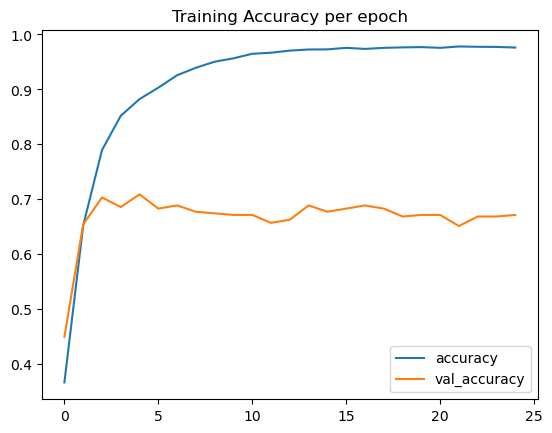

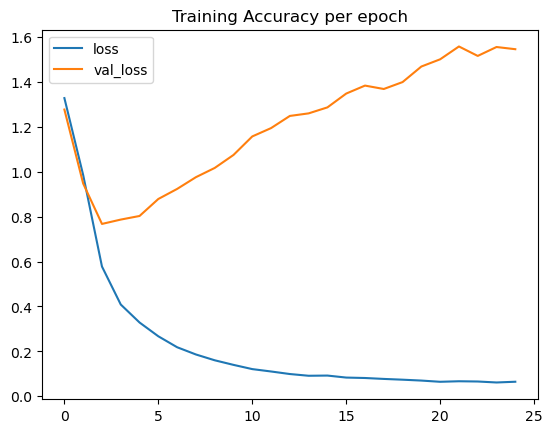

In [ ]:
# Answer here
training_log[["accuracy", "val_accuracy"]].plot(title="Training Accuracy per epoch")
training_log[["loss", "val_loss"]].plot(title="Training Accuracy per epoch")

***第一張圖(Training Accuracy per epoch)***
- accuracy 是模型在訓練集上的準確率。
- val_accuracy 是模型在驗證集上的準確率。
- 從圖中可以觀察到，訓練準確率穩定增加並最終接近 1.0，但驗證準確率在前幾個 epoch 有所提升後開始波動，並且顯著低於訓練準確率。

***第二張圖表(Training Loss per epoch)***
- loss 是模型在訓練集上的損失。
- val_loss 是模型在驗證集上的損失。
- 訓練損失穩定下降並接近 0，但驗證損失在初期下降後反而開始上升，形成了過擬合的跡象。
    
***問題分析***
- 過擬合：訓練集表現非常好（高準確率，低損失），但驗證集表現較差（低準確率，高損失），表示模型過於適應訓練數據，無法很好地泛化到驗證數據。
- 驗證損失上升：隨著訓練進行，val_loss 上升並遠高於 loss，進一步支持了過擬合的結論。

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2355,30351,Watch this amazing live.ly broadcast by @kayla...,"[Watch, this, amazing, live.ly, broadcast, by,..."
1144,20287,Rojo is shocking.......absolutely shocking !!!,"[Rojo, is, shocking, ......., absolutely, shoc..."
3434,40607,More #checking at #work today\n\n#coffee #dran...,"[More, #, checking, at, #, work, today\n\n, #,..."
3255,40428,"@ynnsanity Maybe that's why, we're asked to st...","[@, ynnsanity, Maybe, that, 's, why, ,, we, 'r..."
3436,40609,@holly_lolly7 I just have serious respect for ...,"[@, holly_lolly7, I, just, have, serious, resp..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'kaylaaa_sartorious', '#', 'musically']),
       list(['Rojo', 'is', 'shocking', '.......', 'absolutely', 'shocking', '!', '!', '!']),
       list(['More', '#', 'checking', 'at', '#', 'work', 'today\\n\\n', '#', 'coffee', '#', 'drank', 'and', 'now', 'it', "'s", '#', 'down', 'to', 'some', '#', 'serious', '#', 'business', '\\n\\n', '#', 'Thursday', 'bring', 'on', '#', 'Friday'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 6.8686569e-01,  6.1776537e-01,  7.2415039e-02,  1.0804486e-01,
        3.4493455e-01, -1.2118512e+00,  3.5556394e-01,  1.3224174e+00,
       -3.3288845e-01, -3.9574185e-01, -3.1551406e-01, -1.0508735e+00,
       -4.4235492e-01,  5.5565089e-01, -2.3239951e-01, -6.0705227e-01,
        3.5373089e-01, -4.9153036e-01,  3.3583978e-01, -1.0875256e+00,
        4.7306660e-01,  1.1342876e+00,  4.0203160e-01,  2.3558812e-01,
        3.4465829e-01,  1.8196052e-01, -1.9485155e-01,  4.5403132e-01,
       -5.2892756e-01,  3.5777170e-02,  4.0342948e-01, -4.4791824e-01,
        2.9123840e-01, -9.6482772e-01, -3.1558385e-01,  3.5085049e-01,
        1.5813810e-01, -5.4172081e-01, -4.9060819e-01, -3.7084711e-01,
        3.4257926e-02, -2.9322374e-01, -4.9558768e-01,  1.3835363e-01,
        9.1870934e-01, -2.4213974e-01, -7.1556067e-01,  4.3792475e-04,
        9.4224303e-04,  4.7889892e-02, -2.8578785e-01, -5.1729256e-01,
       -2.0161274e-01, -3.4910497e-01, -7.1052158e-01, -5.3844857e-01,
      

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('tones', 0.9335092306137085),
 ('birthday', 0.9310421943664551),
 ('Be', 0.9276158213615417),
 ('blessed', 0.9264639616012573),
 ('O', 0.922096848487854),
 ('kinda', 0.9212920665740967),
 ('establishment', 0.9186179637908936),
 ('Kik', 0.9160065650939941),
 ('cats', 0.9102703928947449),
 ("'you", 0.9101524949073792)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/Users/ericahsu/Downloads/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


可以利用以下方式將單字向量組成句子向量：
1. 平均池化 (Mean Pooling):
    - 將句子中的每個單詞向量取平均值，形成句子的向量表示。
    - 優點是簡單且計算效率高，但可能忽略了單詞的順序資訊。
2. 加權平均：
    - 使用單詞的重要性權重（如 TF-IDF）來加權每個單詞的向量後再取平均。

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](pics/pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

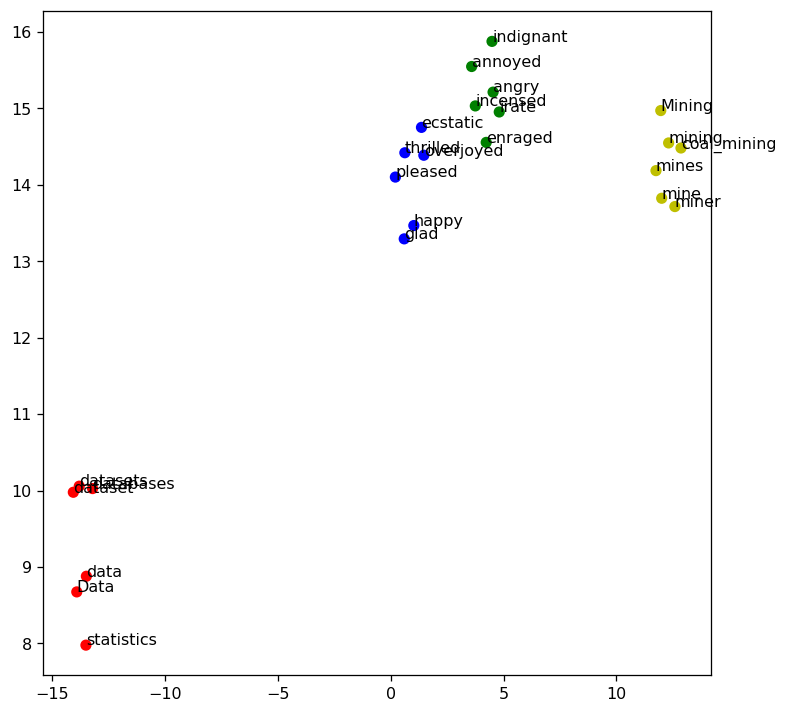

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

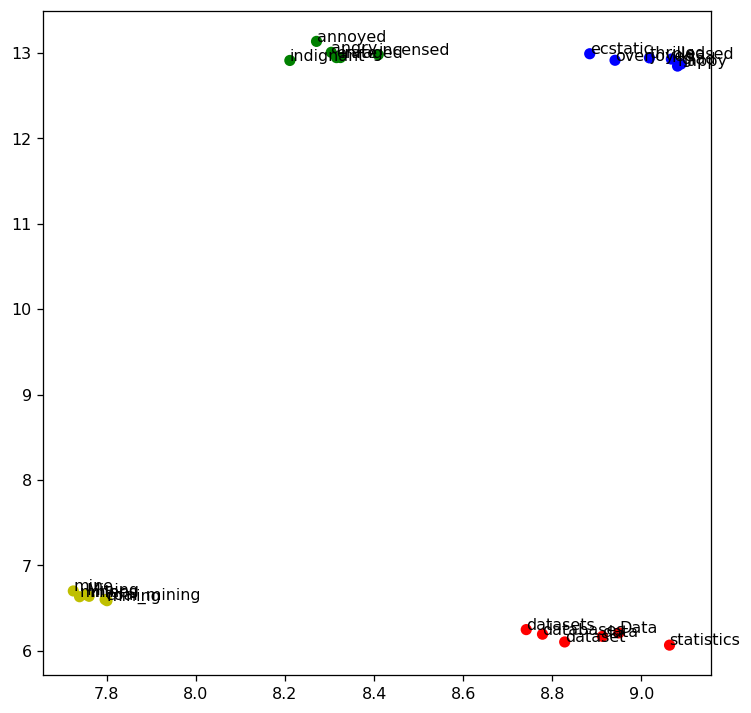

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

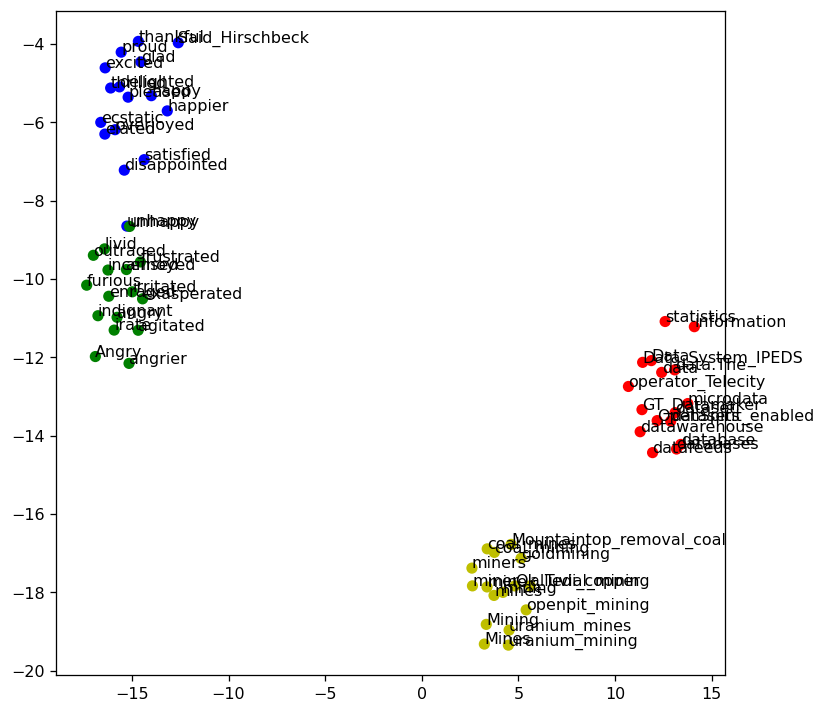

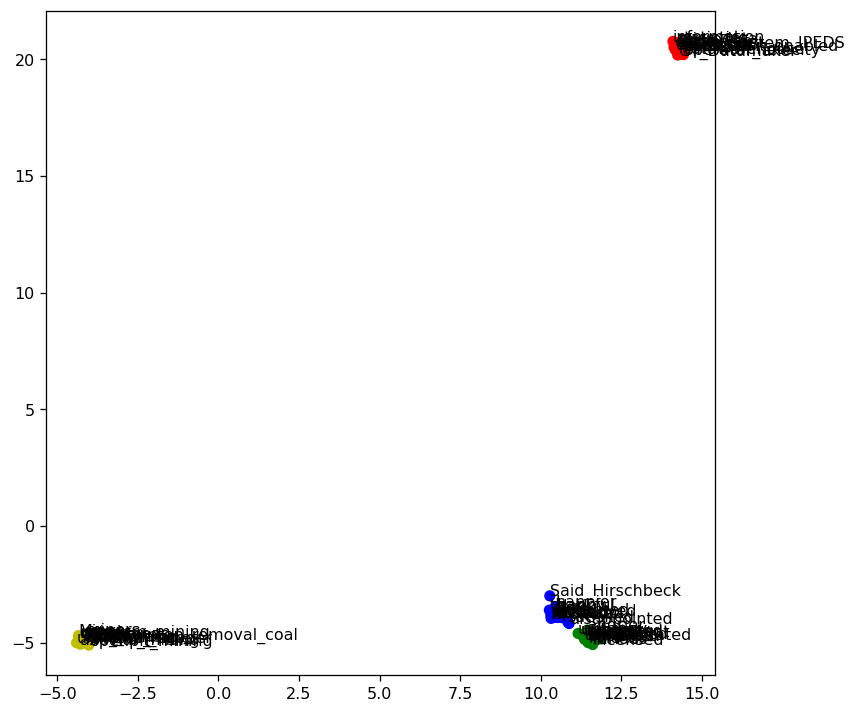

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

# 產生前 15 最相似的字
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]
target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

# 使用 pre-train 的 word2vec 作為模型
model = w2v_google_model

# prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# 降維模型
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

# transform
X_tsne = tsne.fit_transform(X_train)
X_umap = umap_model.fit_transform(X_train)

# plot the tsne result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## plot the UMAP result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



***局部 vs 全局結構***
- 如果 t-SNE（圖一）更強調數據的局部結構，群聚效果可能更明顯，但不同簇之間的距離未必具有語義。
- 如果 UMAP（圖二）更均勻分佈，簇之間的距離可能更具有意義，整體結構更平滑。

***計算效率***
- UMAP 在大數據集上的降維速度更快，而 t-SNE 的計算時間可能更長。

***結果用途***
- 如果目的是純視覺化，t-SNE 的分群效果更直觀。
- 如果後續需要進行聚類或其他分析，UMAP 的結果更適合作為輸入。

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](pics/pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama

In [33]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques, such as machine learning algorithms and statistical methods, to identify valuable information hidden within the data.

### Types of Data Mining

#### 1. **Supervised Learning**

In supervised learning, the algorithm is trained on labeled data to learn the relationship between input features and target variables. The goal is to predict the target variable based on new, unseen data.

#### 2. **Unsupervised Learning**

In unsupervised learning, there is no labeled data, and the algorithm must identify patterns or structure in the data on its own. This type of learning is often used for cluster analysis, dimensionality reduction, and anomaly detection.

#### 3. **Semi-Supervised Learning**

Semi-supervised learning combines both supervised and unsupervised learning approaches by using a small amount of labe

**We can use the IPython library to make the response look better:**

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable knowledge or information from a collection of data.

### Key Characteristics

*   **Automated**: Data mining uses computer algorithms to analyze data without manual intervention.
*   **Large datasets**: Data mining typically deals with massive amounts of data, often in the billions of rows.
*   **Pattern discovery**: The goal is to identify patterns, relationships, and correlations within the data that may not be immediately apparent.

### Types of Data Mining

1.  **Supervised learning**: The algorithm learns from labeled data to make predictions or classifications.
2.  **Unsupervised learning**: The algorithm identifies patterns and structures in unlabeled data without prior knowledge.
3.  **Semi-supervised learning**: A combination of supervised and unsupervised learning techniques are used.

### Applications

*   **Marketing**: Customer segmentation, product recommendation systems
*   **Finance**: Credit risk assessment, fraud detection
*   **Healthcare**: Disease diagnosis, patient outcomes prediction
*   **Business Intelligence**: Data analysis, reporting, and decision-making support

### Techniques Used in Data Mining

1.  **Association Rule Mining**: Identifies relationships between items in a dataset.
2.  **Clustering**: Groups similar data points together based on their characteristics.
3.  **Classification**: Predicts categorical labels or outcomes based on input features.
4.  **Regression**: Estimates continuous values based on input features.

### Challenges and Limitations

*   **Data quality issues**: Noisy, missing, or inconsistent data can affect accuracy.
*   **Overfitting**: Models that are too complex may not generalize well to new data.
*   **Explainability**: Difficulty in understanding the insights and decisions made by machine learning models.

### Conclusion

Data mining is a powerful technique for extracting insights from large datasets. By leveraging various algorithms, statistical techniques, and data preprocessing methods, organizations can uncover valuable patterns, relationships, and knowledge that inform decision-making and drive business success.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [34]:
# Answer here
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content': 'What is data mining? (in markdown format)'
    },
])

display(Markdown(response['message']['content']))

 # Data Mining
## What is Data Mining?

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable information from raw data.

### Types of Data Mining:

*   **Supervised Learning**: The algorithm is trained on labeled data to learn a mapping between input data and output labels.
*   **Unsupervised Learning**: The algorithm learns patterns in unlabeled data without prior knowledge of the correct output.
*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning.

### Data Mining Techniques:

*   **Clustering**: Identifying groups within similar data points based on similarity criteria.
*   **Classification**: Predicting a categorical label or class for new data points.
*   **Regression**: Estimating the value of continuous variables or predicting numerical outcomes.
*   **Association Rule Learning**: Discovering relationships between items in large datasets.

### Data Mining Applications:

*   **Customer Relationship Management (CRM)**: Analyzing customer behavior to improve sales and retention strategies.
*   **Predictive Maintenance**: Identifying potential equipment failures using sensor data and machine learning models.
*   **Recommendation Systems**: Suggesting products or services based on user preferences and purchase history.

### Challenges in Data Mining:

*   **Data Quality Issues**: Handling missing, duplicate, or inconsistent data points can significantly impact analysis results.
*   **Scalability**: Managing large datasets while ensuring performance and accuracy.
*   **Interpretability**: Communicating complex insights effectively to stakeholders without overwhelming them with technical details.

### Future Directions in Data Mining:

*   **Deep Learning**: Integrating deep learning techniques into traditional data mining workflows for improved accuracy and efficiency.
*   **Explainable AI (XAI)**: Developing methods to provide transparent explanations for machine learning model predictions.
*   **Edge Analytics**: Processing data at the edge of the network for real-time insights and decision-making.

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](pics/example1.png)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](pics/example2.jpg)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [35]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/content/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

This image captures a moment of pure joy and freedom, featuring a Shiba Inu dog in mid-air. The dog, with its light orange body contrasted by white fur on its face and legs, has its tongue out as if it's panting from the excitement of running. It's airborne over a lush green field, suggesting it might have just leapt off the ground in play or during a game of fetch.

The background is a soft blur of nature with trees and bushes dotting the landscape. The focus on the dog brings us into its world at that exact moment, highlighting not just the action but also hinting at the environment's tranquility. This image encapsulates both the energy of play and the serenity of nature.

In [36]:
import ollama
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/content/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image features a **gray tabby cat** standing on its hind legs. The cat's body is adorned with black and gray stripes, and it has white paws. Its tail is curved upwards, adding to the playful stance it's in. The cat's eyes are wide open, giving an impression of alertness or curiosity. It appears to be looking directly at the camera, creating a sense of connection with the viewer.

The background of the image is white and features a subtle gray pattern, which contrasts nicely with the cat's colorful appearance. The overall composition of the image places the cat as the central focus, drawing attention to its unique pose and striking colors. There are no other objects or creatures in the image, making the cat the sole subject of this photograph.

Please note that this description is based on what can be confidently determined from the image. It does not include any assumptions or interpretations beyond what is visibly present in the image.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

![image.png](pics/penguins.jpg)

In [ ]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'How many penguins in the picture?',
        'images': ['pics/penguins.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

- There are two adult penguins standing close to each other.
- A baby penguin is sitting on the ground nearby, looking up at them.

我詢問圖片中有幾隻企鵝，模型正確的回答了包含兩隻成年企鵝和一隻幼年企鵝。

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [39]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() # We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

<ipython-input-39-e0ea04df533a>:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


IBM's related solutions for Large Language Models (LLMs) include:

1. **Watsonx.ai**: This is a platform that serves as the generative AI backbone for other IBM products, such as Watsonx Assistant and Watsonx Orchestrate.
2. **Granite model series**: These models are part of IBM's LLM offerings and provide the ability to understand and generate text like a human, among other capabilities.
3. **Watsonx Assistant**: This is an AI-powered chatbot that uses IBM's LLMs to assist customers with their queries and tasks.
4. **Watsonx Orchestrate**: This is a platform that enables organizations to orchestrate and manage their AI workloads, including those powered by IBM's LLMs.

These solutions demonstrate IBM's commitment to leveraging LLMs to enhance its natural language understanding (NLU) and natural language processing (NLP) capabilities, as well as provide accessible and efficient tools for organizations across various industries.

In [47]:
urls = [
    "https://www.ibm.com/granite",
    "https://www.ibm.com/products/watsonx-ai",
    "https://www.ibm.com/products/watsonx-assistant"
]
loader = WebBaseLoader(web_paths=(urls,),bs_kwargs=dict())
docs = []
for url in urls:
    loader = WebBaseLoader(web_paths=(url,), bs_kwargs=dict())
    docs.extend(loader.load())  # 加載並合併結果

In [48]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
splits = text_splitter.split_documents(docs)


### **Actual content in the URL:**
![pic11.png](pics/pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
# Answer here
# Function to load, split, and retrieve documents
def load_and_retrieve_multi_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(web_paths=(url,), bs_kwargs=dict())
        docs.extend(loader.load())  # 加載並合併結果
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

urls = [
    "https://www.ibm.com/granite",
    "https://www.ibm.com/products/watsonx-ai",
    "https://www.ibm.com/products/watsonx-assistant"
]
# Create the retriever
retriever = load_and_retrieve_multi_docs(urls)

# Question 1
print("Question1: What are the related solutions of Granite models?")
result1 = rag_chain("What are the related solutions of Granite models?")
display(Markdown(result1))
print("="*40)

# Question 2
print("Question2: What is watsonx.ai developer studio?")
result2 = rag_chain("What is watsonx.ai developer studio?")
display(Markdown(result2))
print("="*40)

# Question 3
print("Question3: What is watson x Assistant?")
result3 = rag_chain("What is watson x Assistant?")
display(Markdown(result3))
print("="*40)

Question1: What are the related solutions of Granite models?


The related solutions of Granite models are not explicitly mentioned in the provided text. However, based on the context and information about Large Language Models (LLMs) that was discussed:

- The Granite model is likely a type of LLM or foundation model.

- Related solutions would include other LLMs, models similar to Granite, or applications that utilize the capabilities of LLMs.

- Some potential examples might be other language generation models like Retriever-based Language Models (RAG) or related NLU tasks and applications.

Question2: What is watsonx.ai developer studio?


Based on the provided context, Watson X.ai Developer Studio appears to be a platform or tool that allows developers to build, test, and deploy AI-powered applications, specifically those utilizing Large Language Models (LLMs). The name "Watson X.ai" suggests a connection to IBM's Watson platform, which is known for its natural language understanding (NLU) and natural language processing (NLP) capabilities.

The Developer Studio seems to be an end-to-end process for building and testing foundation models and generative AI, providing developers with the tools and resources needed to create and refine their AI applications. The emphasis on responsible innovation and deployment of AI models aligns with IBM's approach to creating and utilizing AI models that advance innovation across enterprises while ensuring data protection and safeguards.

Some key features or aspects of Watson X.ai Developer Studio mentioned in the context include:

1. API integration: Easy access to LLM capabilities through API integrations, making it possible for developers to integrate these technologies into their applications.
2. Text generation: The ability to generate text-based content, such as emails and blog posts, using language generation abilities like retrieval-augmented generation (RAG).
3. Generative AI: The use of LLMs for generative AI capabilities, including foundation models and generative AI development.
4. Data protection safeguards: Regular deployment of data protection safeguards to ensure the secure handling and processing of sensitive information.

Overall, Watson X.ai Developer Studio appears to be a comprehensive platform that enables developers to create, test, and deploy AI-powered applications using LLMs, while ensuring responsible innovation and data protection.

Question3: What is watson x Assistant?


Watson X Assistant is a part of IBM's Watson family of AI technologies, specifically designed as an assistive technology platform that enables developers to build conversational interfaces for various applications and industries.

Watson X Assistant provides several capabilities, including:

1. Text generation: it can generate text responses to user input, such as writing emails or creating content.
2. Speech-to-text functionality: allowing users to interact with the assistant using voice commands.
3. Natural Language Understanding (NLU) and Natural Language Processing (NLP): enabling the assistant to comprehend and respond to user queries.
4. Integration with IBM's AI and data platform, Watson X, which provides an end-to-end process for building and testing foundation models and generative AI.

The goal of Watson X Assistant is to make AI-powered conversational interfaces accessible and easy to use, allowing developers to create innovative solutions that can be integrated into various business functions and use cases.

我分別進入課堂上提供 IBM 首頁的前三個網站，如上圖的主題分別是 Granite models、Next Generation AI Studio、Market-leading conversation AI，分別詢問對應問題如程式碼所示，可以發現因為提供更多的資料，回答得更加豐富。

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [53]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [54]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [55]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [56]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [57]:
df_train # We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
1704,20847,@realDonaldTrump @KellyannePolls New campaign ...,fear,0.354,"[-0.6472905278205872, -0.16306768357753754, 1...."
1152,20295,We in our own country are so divided in our ap...,fear,0.625,"[0.3384973406791687, 0.8852300047874451, 2.440..."
1038,20181,@twlldun @bbcquestiontime @JacobReesMogg @leic...,fear,0.696,"[0.9225085973739624, 0.2774607241153717, 3.346..."
3497,40670,#PeopleLikeMeBecause of some unknown reason bu...,sadness,0.278,"[-0.5896081924438477, 0.5775144696235657, 2.90..."
1940,21083,@BigDaddyx47 awe I'm sorry! I have 2 dogs 3 ca...,fear,0.188,"[-1.0912240743637085, -1.3850306272506714, 3.1..."
...,...,...,...,...,...
636,10636,New madden kicking 🚮,anger,0.396,"[-1.1593899726867676, 1.333085298538208, 2.193..."
1095,20238,wow if i need to start over on SIF im prob gon...,fear,0.667,"[-2.781339645385742, 1.019505500793457, 4.1513..."
2328,30324,"— to reveal a broad smile. \n\n'Yeah, it's nic...",joy,0.542,"[-1.8591060638427734, 0.41451495885849, -1.898..."
2430,30426,Relive Vegas' heyday with Rat Pack tribute,joy,0.480,"[0.032763686031103134, -1.6837546825408936, 0...."


In [58]:
df_test # We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
123,21186,On @Varneyco/@FoxBusiness to talk latest on #C...,fear,0.604,"[-0.6206156015396118, -0.6596912145614624, -0...."
44,10901,You're so thirsty for the chance to disagree w...,anger,0.500,"[-0.5093241930007935, 1.744971752166748, -2.24..."
270,30899,@GigaFag @pipertownsend_ snapchat new would be...,joy,0.396,"[-1.9984110593795776, 0.27509772777557373, -0...."
152,21215,When you're scared to press send #bgoodthepoet...,fear,0.842,"[-1.858068585395813, 0.7572926878929138, 0.704..."
244,30873,If yiu don't respond .o an email within 7 days...,joy,0.220,"[0.6726041436195374, 0.5257771015167236, 1.130..."
...,...,...,...,...,...
128,21191,"They'll be yo friend, shake your hand, then ki...",fear,0.417,"[-1.224920630455017, -0.3205483853816986, -1.2..."
256,30885,@MacDsmash you should get some @SSB_Swedish de...,joy,0.404,"[-0.6786690354347229, -0.566021203994751, 5.83..."
295,40808,If Angelina Jolie can't keep a man no one can....,sadness,0.646,"[-1.6421992778778076, 0.2750973105430603, 3.34..."
304,40817,This world has some serious issues we should a...,sadness,0.750,"[1.1718335151672363, -0.6732707023620605, 3.48..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [60]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [61]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [62]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



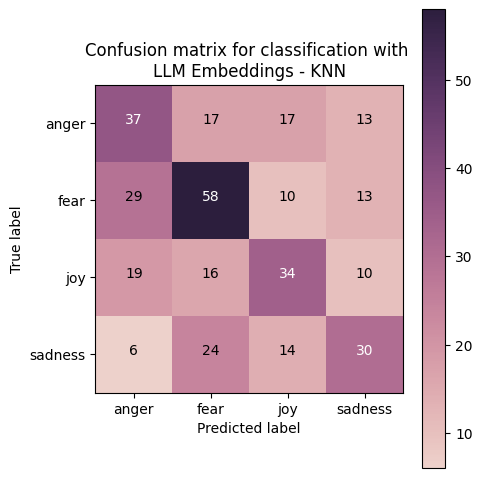

In [65]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3987 - loss: 1.3328 - val_accuracy: 0.5274 - val_loss: 1.1608
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.9031 - val_accuracy: 0.5850 - val_loss: 0.9942
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.6773 - val_accuracy: 0.5908 - val_loss: 1.0926
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.5453 - val_accuracy: 0.5764 - val_loss: 1.1191
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.4480 - val_accuracy: 0.5821 - val_loss: 1.2691
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3624 - val_accuracy: 0.5735 - val_loss: 1.3120
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.3191 - val_accuracy: 0.5764 - val_loss: 1.4206
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2532 - val_accuracy: 0.

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[3.4879174e-03, 7.9337490e-01, 2.0105434e-03, 2.0112669e-01],
       [1.8636035e-04, 9.9922419e-01, 5.4436974e-04, 4.4976925e-05],
       [4.4134462e-01, 1.4614439e-04, 6.5010696e-05, 5.5844420e-01],
       [6.0492437e-03, 4.4411428e-02, 5.8754980e-05, 9.4948047e-01],
       [8.0596912e-01, 1.7712364e-02, 1.3691780e-06, 1.7631720e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'sadness', 'sadness', 'anger'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.56


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.464157,1.199230,0.527378,1.160825
1,1,0.635760,0.878343,0.585014,0.994163
2,2,0.730141,0.690085,0.590778,1.092552
3,3,0.795184,0.564868,0.576369,1.119069
4,4,0.830888,0.454494,0.582133,1.269099
5,5,0.862441,0.384078,0.573487,1.312000
6,6,0.883200,0.316203,0.576369,1.420619
7,7,0.911154,0.263574,0.585014,1.556489
8,8,0.920011,0.221728,0.576369,1.601106
9,9,0.929698,0.196005,0.561960,1.633095


In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.58      0.43      0.49        84
        fear       0.56      0.73      0.63       110
         joy       0.65      0.53      0.58        79
     sadness       0.45      0.47      0.46        74

    accuracy                           0.56       347
   macro avg       0.56      0.54      0.54       347
weighted avg       0.56      0.56      0.55       347



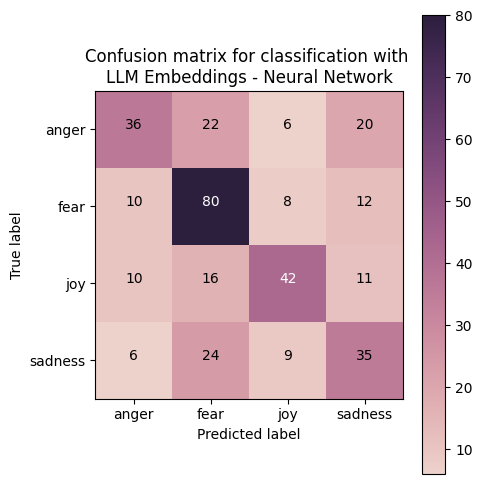

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

<Axes: title={'center': 'Training Accuracy per epoch'}>

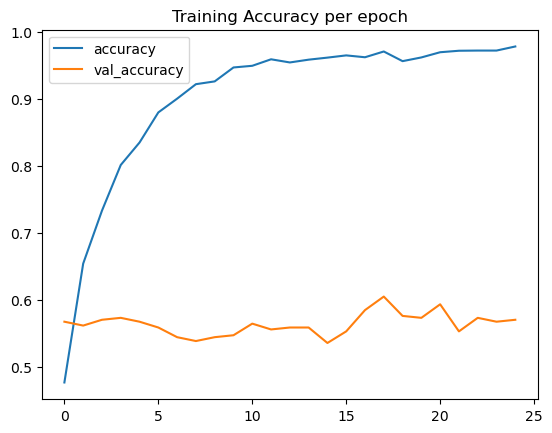

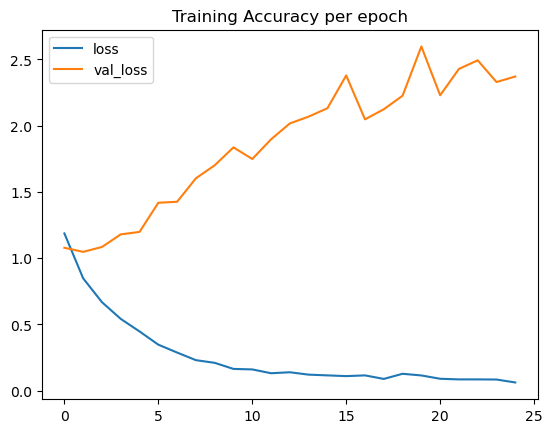

In [ ]:
# Answer here

# load the training log2
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")

# plot
training_log[["accuracy", "val_accuracy"]].plot(title="Training Accuracy per epoch")
training_log[["loss", "val_loss"]].plot(title="Training Accuracy per epoch")

***KNN (LLM embeddings, lamma)***
1. 混淆矩陣顯示：
    - 最佳表現為「fear」，F1-score 為 0.52，且在分類上有較高的召回率（recall）。
    - 其他情緒類別（anger、joy、sadness）的表現相對較低，特別是「sadness」的分類錯誤較多。
2. 總結：
    - 優點：簡單的 KNN 模型能捕捉基本模式，適合作為基線模型。
    - 缺點：效能受限於距離度量方式，難以有效處理高維語義信息。

***NN (word2vec embeddings)***
1. 訓練曲線顯示：
    - 訓練準確率迅速達到接近 1，但驗證準確率在 0.6 左右徘徊，過擬合情況明顯。
    - 驗證損失隨訓練輪數增加反而增大，進一步印證模型對測試數據的泛化能力不足。
2. 總結：
    - 優點：word2vec 提供靜態詞嵌入，適用於基礎任務。
    - 缺點：缺乏上下文理解能力，對需要語義和語境的任務（如情緒分類）表現有限。

***NN (LLM embeddings, lamma)***
1. 混淆矩陣顯示：
    - 「fear」的分類表現最好，召回率為 0.73，F1-score 為 0.63。
    - 「joy」的精度（precision）最高，達到 0.65，但在其他類別中存在少量錯誤分類。
2. 訓練曲線顯示：
    - 訓練集損失穩步下降，準確率提升，但驗證曲線顯示出輕微的過擬合現象。
3. 總結：
    - 優點：使用先進的 LLM embeddings（lamma）捕捉了豐富的語義信息，分類性能顯著優於 KNN 和 word2vec 的 NN 模型。
    - 缺點：驗證集上過擬合現象需改善，可能需要更多的正則化技術。

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.00      0.00      0.00        20
         joy       0.41      0.70      0.52        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.44        80
   macro avg       0.36      0.44      0.38        80
weighted avg       0.36      0.44      0.38        80



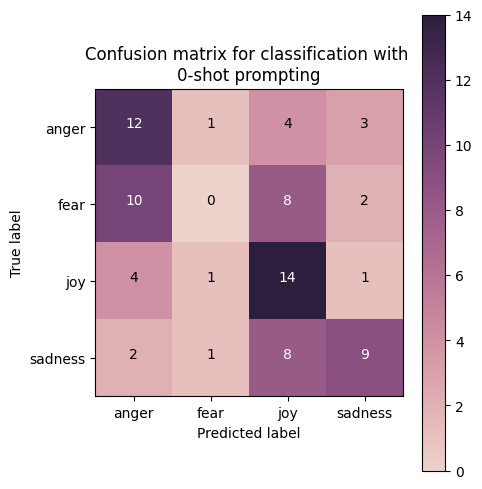

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

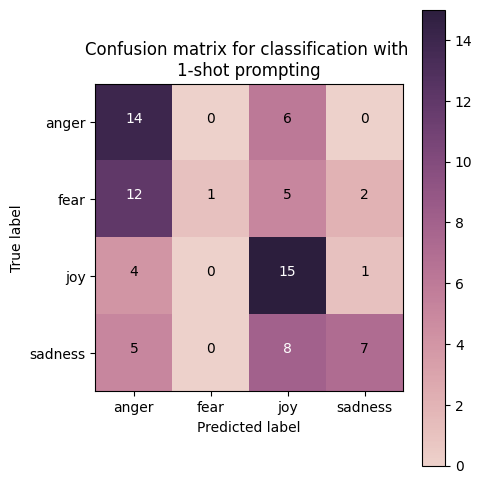

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

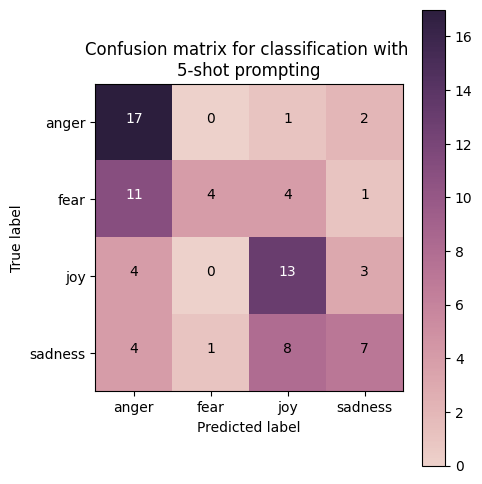

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

***Zero-shot Prompting***
1. Accuracy: 43.75%，為三種方法中最低。
2. Macro Avg F1: 0.38，表現不佳，特別是在「fear」類別中，完全無法正確分類。
3. 混淆矩陣顯示：
    - 「anger」和「sadness」的分類表現相對較好，F1-score 分別為 0.50 和 0.51。
    - 「joy」的分類出現大量混淆，部分樣本被錯分為「anger」和「fear」。
4. 問題：模型缺乏上下文參考和示例，難以準確理解情緒細微差異。

***One-shot Prompting***
1. Accuracy: 46.25%，略有提升。
2. Macro Avg F1: 0.41，對應的平均表現有所改善。
3. 混淆矩陣顯示：
    - 「anger」的召回率提升至 0.70，表明對該類別的識別能力有明顯加強。
    - 「fear」的分類仍不理想，但與 zero-shot 相比稍有進步。
    - 「joy」的分類準確率提升，F1-score 為 0.56，但部分樣本仍混淆到「anger」。
4. 改進原因：加入了一個例子後，模型能參考具體情緒模式，分類能力略微增強。

***Five-shot Prompting***
1. Accuracy: 51.25%，最高。
2. Macro Avg F1: 0.48，表現最佳。
3. 混淆矩陣顯示：
    - 「anger」的精度和召回率大幅提升，F1-score 為 0.61。
    - 「fear」的分類仍然偏弱，但相較前兩種方法，分類比例較平衡。
    - 「joy」的分類結果顯著提升，且混淆程度降低。
4. 改進原因：多個示例幫助模型學習到更全面的情緒分類模式，分類性能顯著提升。

![image.png](pics/table.png)

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---